# Heart Disease Prediction

Using structured data to predict whether a patient has heart disease based on their medical attributes.

## Problem
Given clinical parameters about a patient, can we predict whether they have heart disease?

## Data
The original data came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

Another version of it is available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## Features
This is where you'll get different information about each of the features in your data.

** Create data dictionary**
1. age: age in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
  * 0: Typical angina: chest pain related to decreased blood supply to the heart
  * 1: Atypical angina: chest pain not related to the heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps:resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholesterol in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg: resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave Abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
      - enlarged heart's main pumping chamber
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest; looks at stress of heart during exercise (unhealthy heart will stress more)
11. slope: the slope of the peak exercise ST segment
  * 0: Upsloping (better heart rate with exercise - uncommon)
  * 1: Flatsloping (minimal change - typically healthy heart)
  * 2: Downsloping (signs of unhealthy heart)
12. ca: number of major vessels (0-3) colored by flouroscopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement, the better (no clots)
13. thal: thalium stress test
  * 1-3: normal
  * 6: fixed defect (used to be defect but ok now)
  * 7: reversible defect (no proper blood movement when exercising)
14. target: have disease or not (1 = true; 0 = false); the predicted attribute

### Import Libraries and Tools

In [1]:
# Exploratory Data Analysis and Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# makes plots appear inside the notebook
%matplotlib inline

### Load Data

In [2]:
df = pd.read_csv("heart.csv")
df.shape  # (rows, columns)

(303, 14)

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Determine how many of each class of the target variable there are
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

***Frequency of Heart Disease***

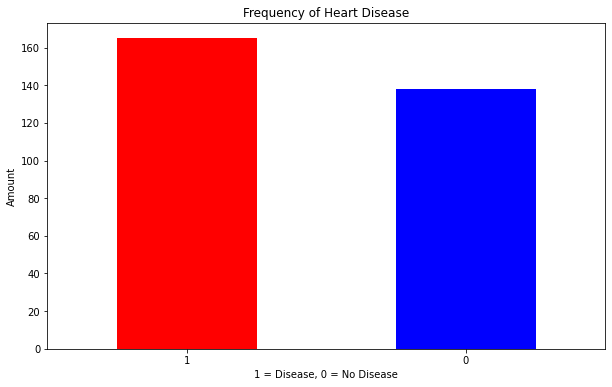

In [6]:
# A visualization of the value counts for the target variable
# target: have disease or not (1 = true; 0 = false)
df.target.value_counts().plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Frequency of Heart Disease')
plt.xlabel('1 = Disease, 0 = No Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0);

We can see that more people have heart disease in our data set than not.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

As you can see, we have more men than women in our data set. Let's see how that correlates to our target variable.

In [10]:
# sex: (1 = male; 0 = female)
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


This is interesting. We can infer from our data set that roughly 75% of women have heart disease and roughly 50% of men have heart disease. This would mean that there is a roughly 62.5% chance that any person has heart disease.

***Sex & Heart Disease Correlation***

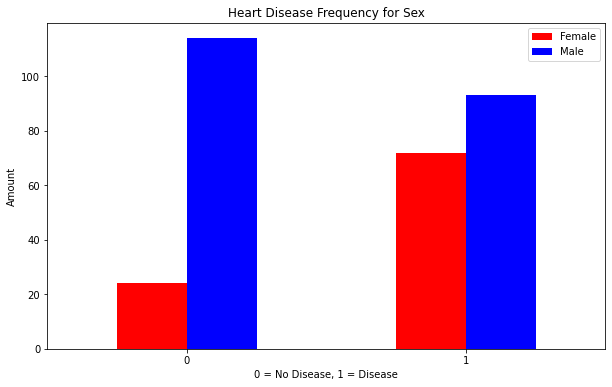

In [11]:
# Create a crosstab plot
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['red', 'blue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

***Age vs. Max Heart Rate for Heart Disease***<br/>

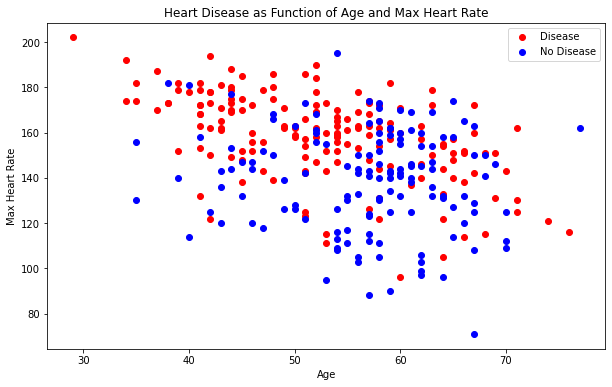

In [12]:
# Scatter plot with Heart Disease Outcome
plt.figure(figsize=(10, 6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='red')

# Scatter plot without Heart Disease Outcome
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='blue')

plt.title('Heart Disease as Function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

There's not much of a pattern here, but if you look really close, there appears to be a slightly downward trend. Basically, as a person gets older, their max heart rate declines.

***Distribution of Age***

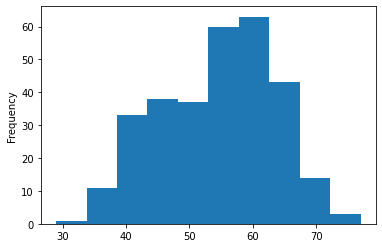

In [13]:
df.age.plot.hist();

With distribution, the ideal visualization would be that of a bell curve (normal distribution). In our example, there appears to be a slight skewness to the curve towards the right, but it is mostly that of a normal distribution.

***Chest Pain Type & Heart Disease Correlation***<br/>
  - 0: Typical angina: chest pain related to decreased blood supply to the heart
  - 1: Atypical angina: chest pain not related to the heart
  - 2: Non-anginal pain: typically esophageal spasms (non heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


It seems as non heart related chest pain goes up, so does the chance of heart disease. This is strange. Let's visualize this.

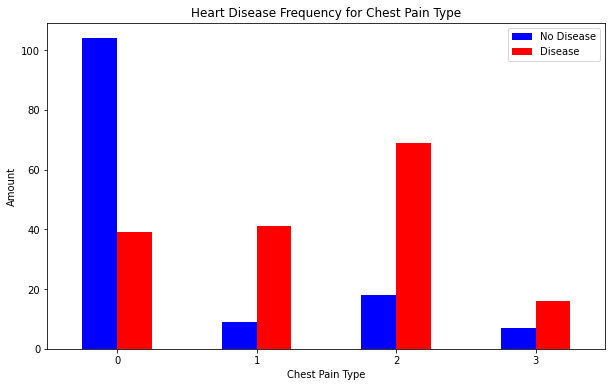

In [15]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['blue', 'red'])
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

***Correlation Matrix***

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


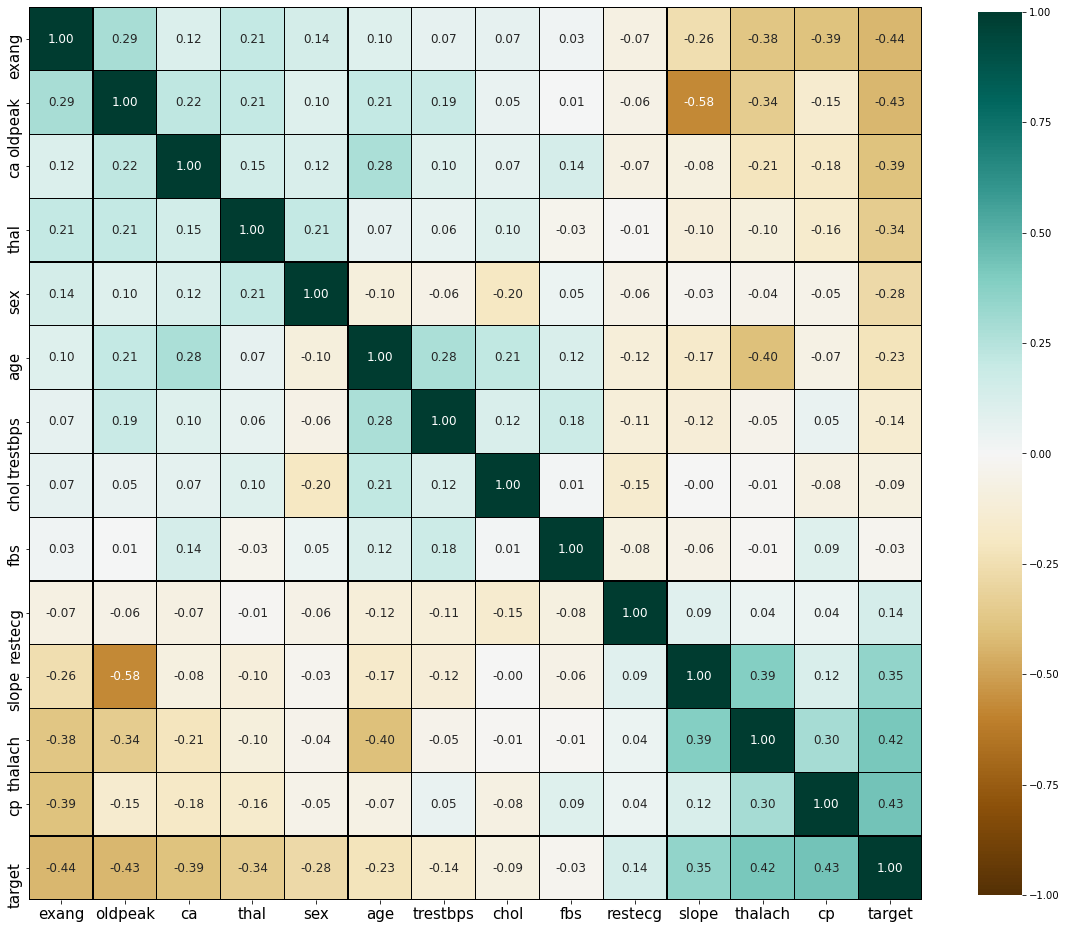

In [17]:
# correlation matrix
ix = df.corr().sort_values('target', ascending=True).index
df_sorted = df.loc[:, ix]
corrmat = df_sorted.corr()
fig, ax = plt.subplots(figsize=(20, 25))
g = sns.heatmap(corrmat, vmin=-1.0, vmax=1.0, square=True, annot=True, fmt='.2f', annot_kws={'size': 12}, cbar_kws= {'shrink': 0.65}, linecolor='black', center=0, linewidths=.25, cmap='BrBG')
g.tick_params(labelsize=15)

This matrix makes determining a feature's relationship with heart disease more noticeable. As we can see, those features having a negative correlation indicates that as that feature increases, the chance of having heart disease decreases or vice-versa. On the other hand, those features having a positive correlation indicates that as that feature increases, the chance of having heart disease also increases.

It also appears that chest pain type and max heart rate achieved have the highest positive correlation with heart disease. Exercise-induced angina and the stress of the heart during exercise have the lowest correlation and the most negative correlation with heart disease.

Let's see how these features can be used in our machine learning model.

### Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df.target

In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
# Split data into train and test sets
np.random.seed(33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 13) (242,) (61, 13) (61,)


Now that we've split our data into training and test sets, we can build a machine learning model.

We are going to explore using 3 different machine learning algorithms to find the best fit for our data:
* Logistic Regression
* K-Nearest Neighbors Classifier
* Random Forest Classifier

In [24]:
# Put models in dictionary
models = {'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(33)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5245901639344263,
 'Random Forest': 0.819672131147541}

### Model Comparison

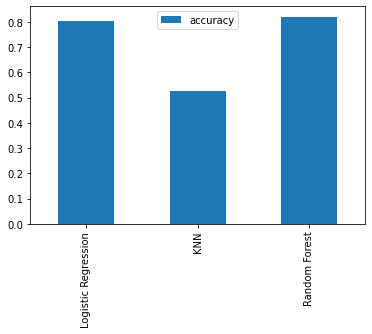

In [26]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now that we've got a baseline model, we can take a look at some other things to consider:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### Hyperparameter Tuning
<strong>Tuning KNN</strong>

In [27]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Create KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the testing scores list
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.8181818181818182,
 0.7933884297520661,
 0.7975206611570248,
 0.8057851239669421,
 0.78099173553719,
 0.768595041322314,
 0.7603305785123967,
 0.7396694214876033,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7355371900826446,
 0.7272727272727273,
 0.7024793388429752,
 0.71900826446281,
 0.7148760330578512,
 0.7272727272727273,
 0.7231404958677686,
 0.7148760330578512]

In [29]:
test_scores

[0.47540983606557374,
 0.45901639344262296,
 0.47540983606557374,
 0.4918032786885246,
 0.5245901639344263,
 0.5737704918032787,
 0.5573770491803278,
 0.5737704918032787,
 0.5409836065573771,
 0.5573770491803278,
 0.5409836065573771,
 0.5409836065573771,
 0.5573770491803278,
 0.5737704918032787,
 0.5245901639344263,
 0.5409836065573771,
 0.5245901639344263,
 0.5081967213114754,
 0.5245901639344263,
 0.5409836065573771]

Maximum KNN score on the test data: 57.38%


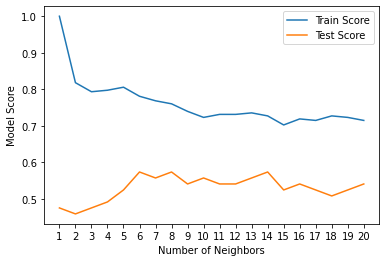

In [30]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter Tuning With RandomizedSearchCV
<strong>Logistic Regression</strong>

In [31]:
# Create a hyperparameter grid
log_reg_grid = {'C': np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

In [32]:
# Tuning LogisticRegression
np.random.seed(33)

# Create random hyperparameter search
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

<strong>Random Forest Classification</strong>

In [35]:
# Create a hyperparameter grid
rf_grid = {'n_estimators': np.arange(800, 1200, 10), 
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(10, 20, 2),
          'min_samples_leaf': np.arange(10, 20, 1)}

In [36]:
# Tuning RandomForestClassifier
np.random.seed(33)

# Create random hyperparameter search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_split': array([10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 800,  810,  820,  830,  840,  850,  860,  870,  880,  890,  900,
        910,  920,  930,  940,  950,  960,  970,  980,  990, 1000, 1010,
       1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120,
       1130, 1140, 1150, 1160, 1170, 1180, 1190])},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 1060,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [38]:
rs_rf.score(X_test, y_test)

0.8360655737704918

In [39]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.5245901639344263,
 'Random Forest': 0.819672131147541}

As we can see, we've been able to improve our scores by a few percentage points with each model by using hyperparameter tuning with RandomizedSearchCV. However, we still need to get our score even higher. Let's look at GridSearchCV as an alternative to RandomizedSearchCV to further improve our scores.

### Hyperparameter Tuning With GridSearchCV
Since our RandomForestClassifier model provides the best scores so far, we'll try to improve our scores again using GridSearchCV.

In [41]:
# Different parameters for our RandomForestClassifier model
rf_grid = {'n_estimators': np.arange(1000, 1020, 1), 
          'max_depth': np.arange(5, 10, 1),
          'min_samples_split': np.arange(10, 15, 1),
          'min_samples_leaf': np.arange(10, 15, 1),
          'n_jobs': [-1]}

# Create hyperparameter search
gs_rf = GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv=5,
                               verbose=True)

# Fit random hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 11, 12, 13, 14]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019]),
                         'n_jobs': [-1]},
             verbose=True)

In [42]:
gs_rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 14,
 'min_samples_split': 13,
 'n_estimators': 1012,
 'n_jobs': -1}

In [43]:
gs_rf.score(X_test, y_test)

0.8524590163934426

It seems that we were able to improve our score with GridSearchCV. It doesn't look like we can tune the parameters any further. Let's evaluate our tuned machine learning classifier beyond accuracy.

## Evaluating Model

In [44]:
# Make predictions with tuned model
y_preds = gs_rf.predict(X_test)

In [45]:
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [46]:
y_test

249    0
294    0
273    0
204    0
81     1
      ..
237    0
254    0
38     1
174    0
241    0
Name: target, Length: 61, dtype: int64

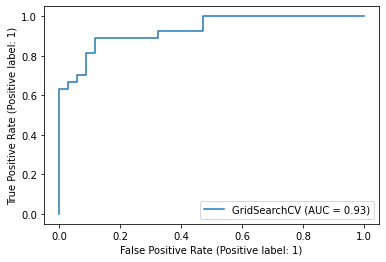

In [47]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf, X_test, y_test);

An AUC value of 1.0 is ideal, and we have a value of 0.93. Not bad for a baseline tuned model!

In [48]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[28  6]
 [ 3 24]]


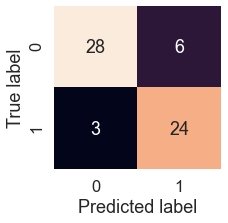

In [49]:
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

The confusion matrix tells us how many false positives and false negatives that we have. In our case, we had 6 false positives and 3 false negatives. A perfect model would have neither false positives nor false negatives, but who's perfect? Let's look at a classification report as well as cross-validated precision, recall, and f1-score.

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.80      0.89      0.84        27

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



* Precision indicates the proportion of positive identifications (the model predicts a 1, which is has heart disease) which were actually correct. Ideal value for precision is 1.0. A model with no false positives has a precision of 1.0.
* Recall indicates the proportion of actual positives which were correctly classified. Ideal value for recall is 1.0. A model with no false negatives has a recall of 1.0.
* F1 score is a combination of precision and recall. Ideal value for F1 score is 1.0, representing a perfect model. If our precision and recall values were 1.0, our F1 score would also be 1.0.
* Support is the number of samples each metric was calculated on in our test data set.
* Accuracy is the F1 score, which is a weighted average of the precision and recall. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall). Ideal value of accuracy is 1.0.
* Macro average is the average precision recall and F1 score between classes. This metric doesn't take class imbalances into account. Ideal value is 1.0.
* Weighted average is the weighted average precision recall and F1 score between classes. Weighted means that each metric is calculated with respect to how many samples there are in each class. This metric will favor the majority class. Its ideal value is 1.0.

### Calculate Evaluation Metrics Using Cross-Validation
Since classification_report() method uses a normal train and test split to create its values, we will determine our metrics (precision, recall, and F1 score) using a 5-fold cross-validation instead.

In [51]:
# Check best hyperparameters
best_params = gs_rf.best_params_
best_params

{'max_depth': 6,
 'min_samples_leaf': 14,
 'min_samples_split': 13,
 'n_estimators': 1012,
 'n_jobs': -1}

In [52]:
# Create a new classifier with best parameters
clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                             min_samples_split=best_params['min_samples_split'],
                             min_samples_leaf=best_params['min_samples_leaf'],
                             max_depth=best_params['max_depth'],
                             n_jobs=best_params['n_jobs'])

In [53]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_acc

array([0.83606557, 0.90163934, 0.80327869, 0.88333333, 0.75      ])

In [59]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8348633879781421

In [60]:
# Cross-Validated Precision
cv_precision = cross_val_score(clf, X, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8385798777246146

In [61]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.8848484848484848

In [62]:
# Cross-Validated F1-Score
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8596163560172663

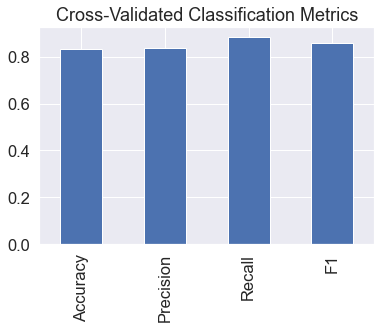

In [63]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                     legend=False);

### Feature Importance

In [64]:
# Check best parameters
best_params = gs_rf.best_params_
best_params

{'max_depth': 6,
 'min_samples_leaf': 14,
 'min_samples_split': 13,
 'n_estimators': 1012,
 'n_jobs': -1}

In [66]:
# Different parameters for our RandomForestClassifier model
rf_grid = {'n_estimators': [1012], 
          'max_depth': [6],
          'min_samples_split': [14],
          'min_samples_leaf': [13],
          'n_jobs': [-1],
          'max_features': range(1, 14),}

# Create hyperparameter search
gs_rf = GridSearchCV(RandomForestClassifier(),
                               param_grid=rf_grid,
                               cv=5,
                               verbose=True)

# Fit hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6], 'max_features': range(1, 14),
                         'min_samples_leaf': [13], 'min_samples_split': [14],
                         'n_estimators': [1012], 'n_jobs': [-1]},
             verbose=True)

In [67]:
best_params = gs_rf.best_params_
best_params

{'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 13,
 'min_samples_split': 14,
 'n_estimators': 1012,
 'n_jobs': -1}

In [68]:
 model = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],
                                  max_features=best_params["max_features"], min_samples_leaf=best_params["min_samples_leaf"],
                               min_samples_split=best_params['min_samples_split'], n_jobs=-1,
                                  random_state=33)

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=2, min_samples_leaf=13,
                       min_samples_split=14, n_estimators=1012, n_jobs=-1,
                       random_state=33)

In [70]:
model.score(X_test, y_test)

0.8360655737704918

In [71]:
model.feature_importances_

array([0.05816216, 0.02783189, 0.16456038, 0.02192953, 0.03224539,
       0.0005444 , 0.01455925, 0.13247553, 0.09066941, 0.12207027,
       0.07810425, 0.13508581, 0.12176173])

In [72]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [73]:
feat_importance = []
for feature in zip(X.columns, model.feature_importances_):
        feat_importance.append(feature)

In [74]:
importance = pd.DataFrame(feat_importance,columns=["Feature", "Importance"])
print(importance.sort_values(by=["Importance"],ascending=False))

     Feature  Importance
2         cp    0.164560
11        ca    0.135086
7    thalach    0.132476
9    oldpeak    0.122070
12      thal    0.121762
8      exang    0.090669
10     slope    0.078104
0        age    0.058162
4       chol    0.032245
1        sex    0.027832
3   trestbps    0.021930
6    restecg    0.014559
5        fbs    0.000544


In [75]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [76]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment
- 0: Upsloping (better heart rate with exercise - uncommon)
- 1: Flatsloping (minimal change - typically healthy heart)
- 2: Downsloping (signs of unhealthy heart)

## Experimentation
Since we can probably improve our model a bit more, we will use a boosting algorithm to improve our accuracy.

In [77]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=model, learning_rate=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7868852459016393

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.819672131147541

## Deploying Our Model
Since our model seems to be sufficient for our use case, we will deploy it by converting our model to a pickle file.

In [81]:
pip install scikit-learn==0.24.2

Note: you may need to restart the kernel to use updated packages.


In [82]:
from sklearn.ensemble import AdaBoostClassifier
import pickle

clf = AdaBoostClassifier(n_estimators=100, base_estimator=model, learning_rate=1)
clf.fit(X_train, y_train)

pickle.dump(clf, open('./model.pkl','wb'))